In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [37]:
# 1. dataset <-- transaction.csv, dan tampilkan
dataset = pd.read_csv('transaction.csv')
dataset.tail()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada
10545,564428,23294,643,8/25/2011 11:27,17844,Canada


In [38]:
# 2. country <-- berapa kemunculan tiap negara pada dataset, dan tampilkan
country = dataset['Country'].value_counts()
country

Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community         5
Czech Republic             4
Bahrain       

In [39]:
# 3. transaksi <-- hitunglah banyaknya transaksi pada tiap negara (1 kode InvoiceNo = 1 transaksi)
transaksi = dataset.groupby('Country')['InvoiceNo'].nunique()
transaksi

Country
Australia                44
Austria                  12
Bahrain                   1
Belgium                  84
Brazil                    1
Canada                    3
Channel Islands          21
Cyprus                   16
Czech Republic            2
Denmark                  18
EIRE                    224
European Community        3
Finland                  26
France                  344
Germany                 377
Greece                    5
Iceland                   6
Israel                    4
Italy                    31
Japan                    14
Lebanon                   1
Lithuania                 2
Malta                     2
Netherlands              76
Norway                   28
Poland                   17
Portugal                 43
RSA                       1
Saudi Arabia              1
Singapore                 4
Spain                    72
Sweden                   26
Switzerland              41
USA                       5
United Arab Emirates      2
Unspecified 

In [40]:
# 4. cluster <-- lakukan clustering pada transaksi dengan Average Linkage, dengan k=3
k = 3
cluster = AgglomerativeClustering(n_clusters=k, linkage='average').fit_predict(transaksi.values.reshape(-1, 1))
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
# 5. centroid <-- tentukan posisi centroid dari setiap cluster
mat
centroids

[18.78787878787879, 360.5, 224.0]

In [42]:
# 6. sorted <-- lakukan pengurutan posisi centroid secara ascending
sorted = np.argsort(centroids)
sorted

array([0, 2, 1])

In [43]:
# 7. Indeks terdepan dari centroid setelah pengurutan, mengindikasikan cluster
# transanksi rendah. Indeks terakhir dari centroid setelah pengurutan,
# mengindikasikan cluster transanksi tinggi. Indeks di antaranya, mengindikasikan
# cluster transanksi sedang. Tampilkan negara mana saja yang transaksinya rendah,
# sedang dan tinggi.

low_transaksi_cluster = sorted[0]
high_transaksi_cluster = sorted[-1]
medium_transaksi_clusters = sorted[1]

low_transaksi_countries = transaksi.index[cluster == low_transaksi_cluster]
medium_transaksi_countries = transaksi.index[cluster == medium_transaksi_clusters]
high_transaksi_countries = transaksi.index[cluster == high_transaksi_cluster]

print("Negara dengan transaksi rendah:", low_transaksi_countries)
print("Negara dengan transaksi sedang:", medium_transaksi_countries)
print("Negara dengan transaksi tinggi:", high_transaksi_countries)

Negara dengan transaksi rendah: Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark',
       'European Community', 'Finland', 'Greece', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain',
       'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'Unspecified'],
      dtype='object', name='Country')
Negara dengan transaksi sedang: Index(['EIRE'], dtype='object', name='Country')
Negara dengan transaksi tinggi: Index(['France', 'Germany'], dtype='object', name='Country')


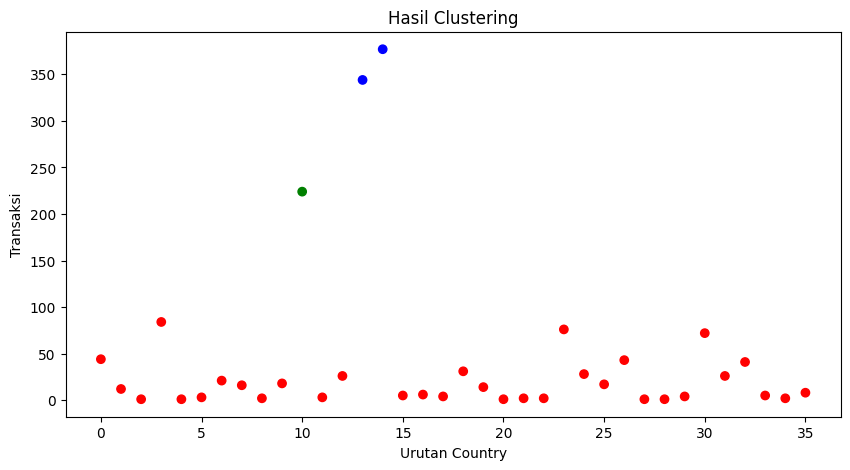

In [44]:
# 8. Visualisasi dengan warna yang berbeda untuk hasil cluster (no. 7), dimana sumbu
# x=urutan country dan sumbu y=transaksi
colors = ['r' if c == low_transaksi_cluster else 'g' if c == medium_transaksi_clusters else 'b' for c in cluster]
x = range(len(transaksi))
y = transaksi.values

plt.figure(figsize=(10, 5))
plt.scatter(x, y, c=colors)
plt.xlabel("Urutan Country")
plt.ylabel("Transaksi")
plt.title("Hasil Clustering")
plt.show()